In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
df = pd.read_csv("../data/raw_reviews.csv")
df['at'] = pd.to_datetime(df['at'])
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cbaf10a2-0025-41b3-ac34-765f187f186a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,EDIT - Komoot is the best app for walks!.. Rea...,3,11,25.5.20,2025-05-19 13:06:35,Hi Holly - thanks for the feedback. The pro me...,2020-01-24 04:41:23,25.5.20
1,53e0eb2b-93fc-4113-8828-851c75316632,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,the offline maps and route tracking are very u...,5,0,25.5.21,2025-05-19 12:25:30,NaN,NaN,25.5.21
2,1ec43755-e36b-40ad-9000-741a266bb741,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,5,0,25.5.20,2025-05-19 06:45:30,NaN,NaN,25.5.20
3,bd6c8fff-bc73-449e-a7e1-bd3fe79f576a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,are you insane? 800$ yearly for the app and I ...,1,0,25.5.20,2025-05-19 05:57:00,NaN,NaN,25.5.20
4,0e0e8656-2304-4986-b80b-ba1a74aa9add,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,sooooo many cool trails :),5,0,19.17.0,2025-05-19 05:38:45,NaN,NaN,19.17.0
...,...,...,...,...,...,...,...,...,...,...,...
30941,9fe40dbb-e129-4cc4-acd5-a0fadb74634d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Trouble viewing maps...how do you get there if...,2,1,1.0.4,2011-09-23 23:00:02,We just released an awesome new version of All...,2013-10-04 07:37:13,1.0.4
30942,37f8c755-4d87-4a1d-9b9e-92554445447e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Downloaded app and never worked. Emailed for s...,1,2,1.0.4,2011-09-22 03:01:25,We just released an awesome new version of All...,2013-10-04 07:37:17,1.0.4
30943,9f0f4d58-57f3-46f8-bfaa-a6d5c4fb132d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Great app, no problems yet, just wish there we...",4,1,1.0.3,2011-09-18 06:55:44,NaN,NaN,1.0.3
30944,30a42057-2515-4450-9c19-5eeeb47a0fde,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Works once after install. All other times afte...,1,1,1.0.2,2011-09-15 16:00:08,We just released an awesome new version of All...,2013-10-04 07:37:22,1.0.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30946 entries, 0 to 30945
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              30946 non-null  object        
 1   userName              30946 non-null  object        
 2   userImage             30946 non-null  object        
 3   content               30937 non-null  object        
 4   score                 30946 non-null  int64         
 5   thumbsUpCount         30946 non-null  int64         
 6   reviewCreatedVersion  27933 non-null  object        
 7   at                    30946 non-null  datetime64[ns]
 8   replyContent          8529 non-null   object        
 9   repliedAt             8529 non-null   object        
 10  appVersion            27933 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 2.6+ MB


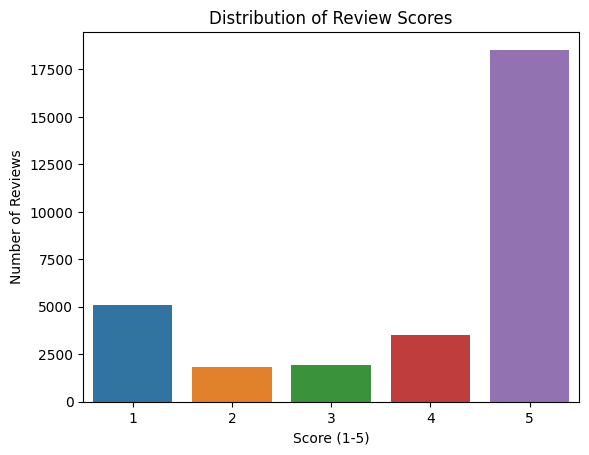

In [14]:
sns.countplot(data=df, x='score')
plt.title('Distribution of Review Scores')
plt.xlabel('Score (1-5)')
plt.ylabel('Number of Reviews')
plt.show()

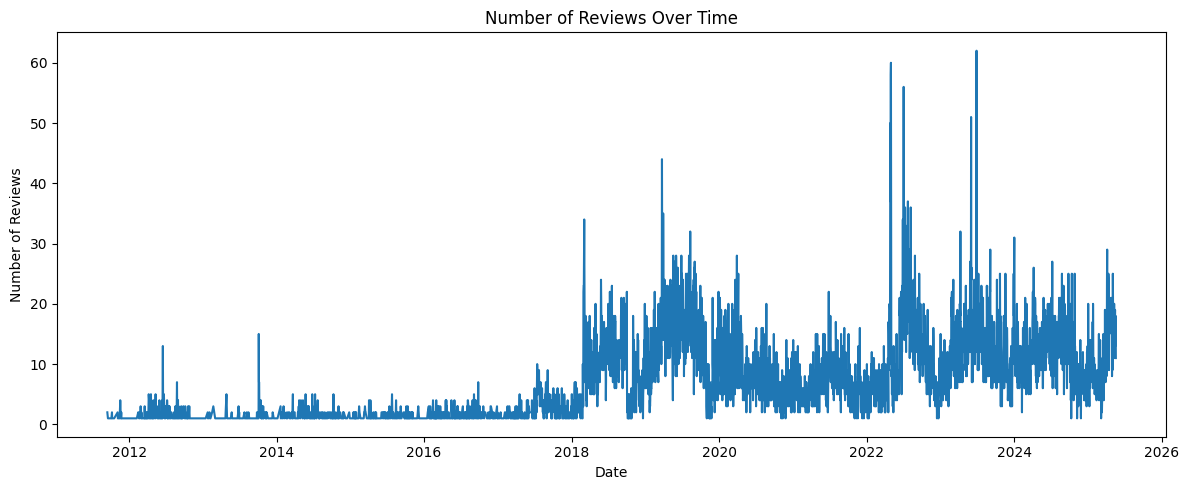

In [17]:
df.groupby(df['at'].dt.date).size().plot(figsize=(12, 5))
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

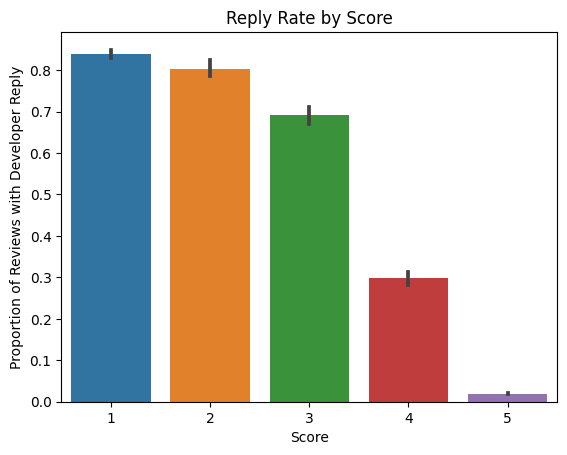

In [18]:
df['has_reply'] = df['replyContent'].notna()
sns.barplot(data=df, x='score', y='has_reply')
plt.title('Reply Rate by Score')
plt.ylabel('Proportion of Reviews with Developer Reply')
plt.xlabel('Score')
plt.show()

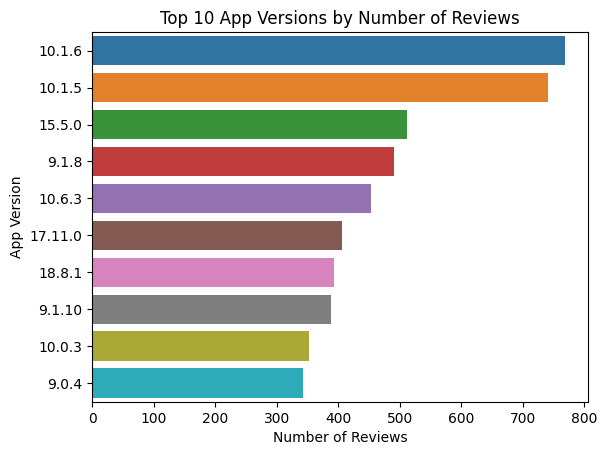

In [19]:
top_versions = df['appVersion'].value_counts().head(10)
sns.barplot(x=top_versions.values, y=top_versions.index)
plt.title('Top 10 App Versions by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('App Version')
plt.show()

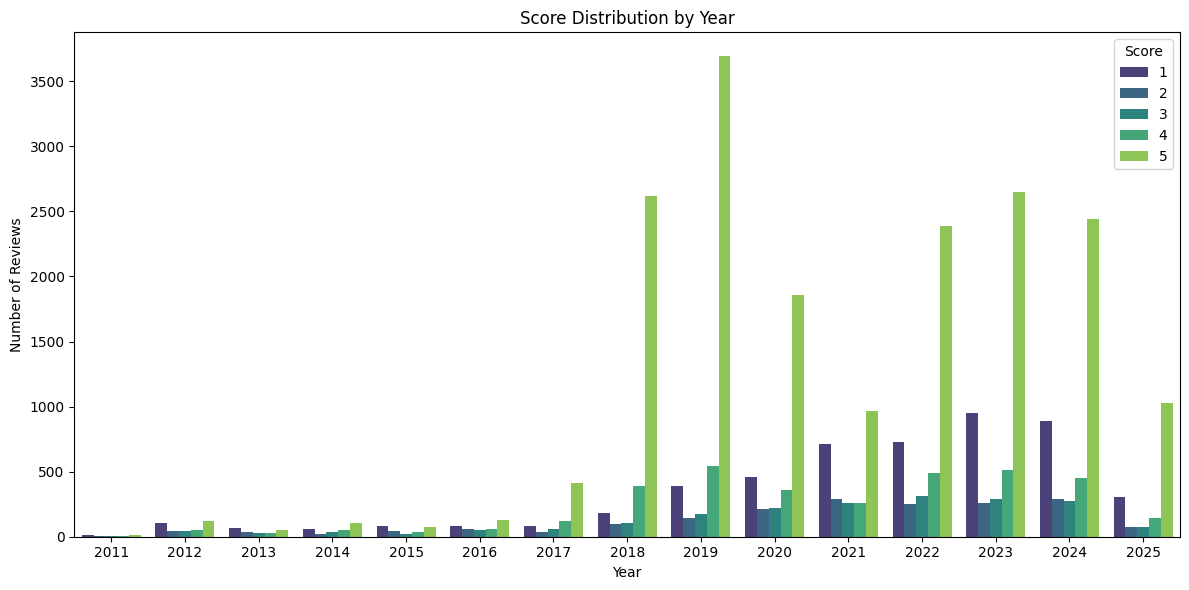

In [23]:
df['year'] = df['at'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='score', data=df, palette='viridis')
plt.title('Score Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Score')
plt.tight_layout()
plt.show()


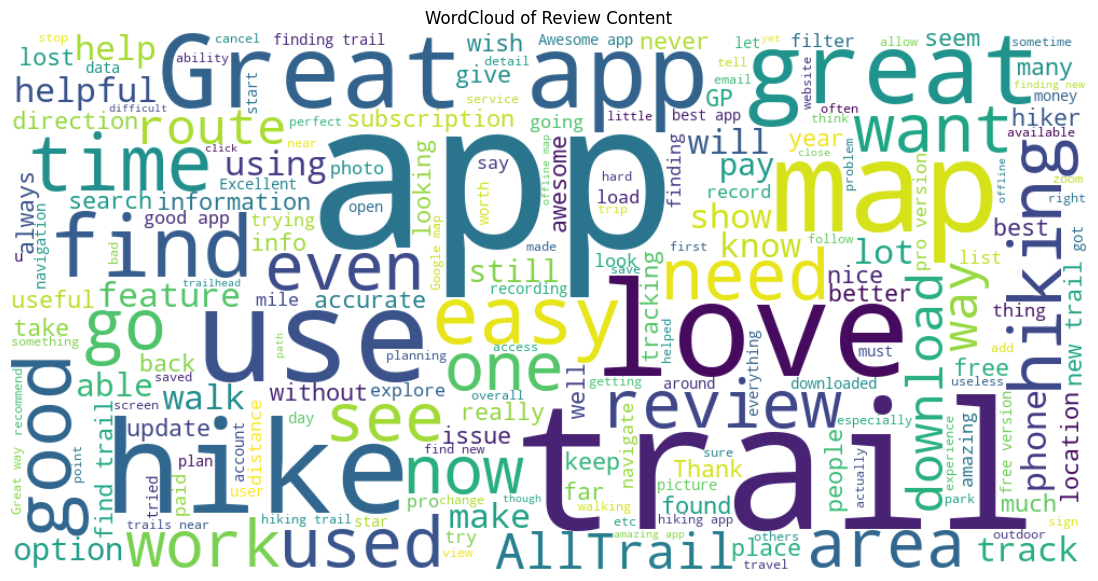

In [24]:
all_text = " ".join(df['content'].dropna().astype(str))

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Review Content')
plt.show()